In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

# **Práctica Dirigida: Calibrando una imagen para medición de distancia**

In [2]:
!gdown --id 1DpAa_ZegoM4bjcTbhel0jyNkhg5bHfr4

D:\Codes\image-processing\.env\Lib\site-packages\gdown\cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DpAa_ZegoM4bjcTbhel0jyNkhg5bHfr4
To: d:\Codes\image-processing\src\6_Dominio_Frecuencia\imagen.png

  0%|          | 0.00/275k [00:00<?, ?B/s]
100%|██████████| 275k/275k [00:00<00:00, 2.36MB/s]
100%|██████████| 275k/275k [00:00<00:00, 2.36MB/s]


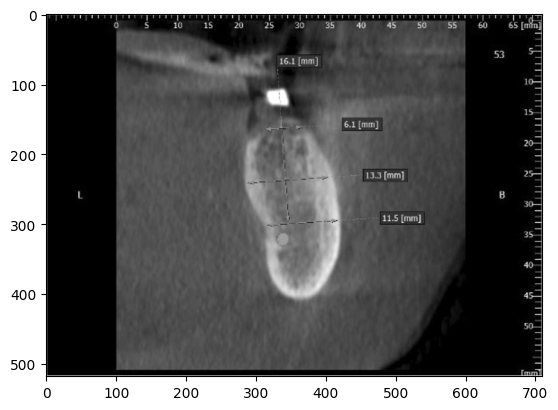

In [3]:
filename = 'imagen.png'
im = imread(filename, as_gray=True)
plt.imshow(im, cmap='gray')

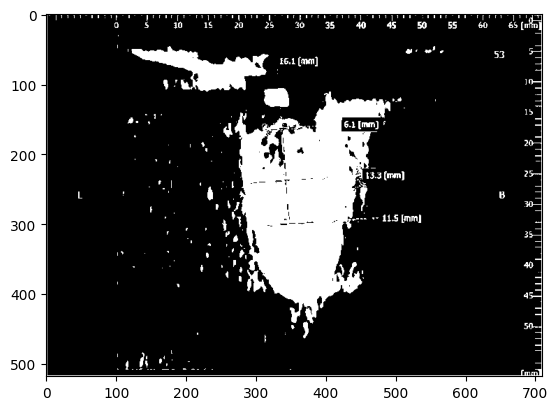

In [4]:
#@title Default title text { run: "auto" }
th = 0.36 #@param {type:"slider", min:0, max:1, step:0.01}
im_th = (im>th)*1.0 
plt.imshow(im_th, cmap='gray')

In [5]:
im.shape

(518, 710)

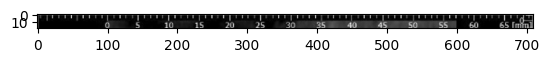

In [6]:
#@title Default title text { run: "auto" }
porcentaje = 0.04 #@param {type:"slider", min:0, max:1, step:0.01}
top_n_pixels = int(im.shape[0]*porcentaje) #Vamos a tomar el 2%  superior de la imagen
plt.imshow(im[:top_n_pixels, :], cmap='gray')

### Generar Templates

In [7]:
def generate_pattern(h, w, pixel_spacing=0.1, offset=0):
  x=np.linspace(0, 2*np.pi, w)
  y=np.sin(x/pixel_spacing*2*np.pi+offset)
  return np.repeat(y, h).reshape(h,w,order='F')

Probar el método

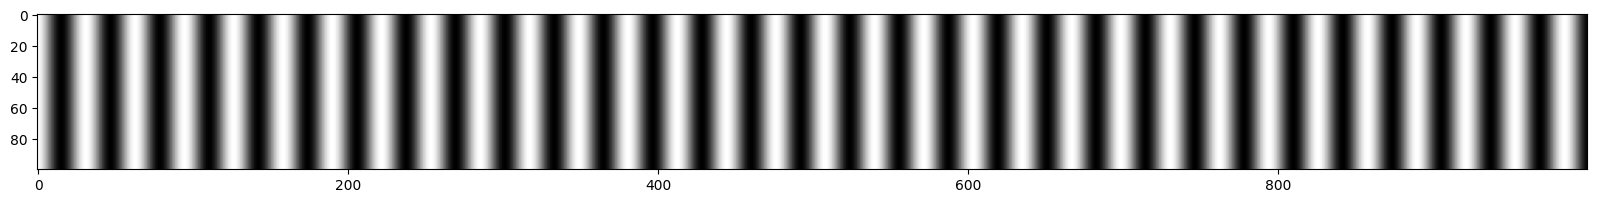

In [8]:
plt.figure(figsize=(20,10))
plt.imshow(generate_pattern(100, 1000, pixel_spacing=0.2, offset=8), cmap='gray')

### Implementar Similaridad de Coseno

Recuerde la definición: $cos(a, b)= \frac{a . b}{\|a\| \|b\|}$ donde $a . b$ es el producto interno de los vectores $a$ y $b$ 

In [9]:
def cosine(input, template):
  ### Implemente aqui
  #recuerde que tiene a y b seran matrices, pero con .ravel() 
  #podra volverlos vectores

  return np.dot(input.ravel(), template.ravel())/(np.linalg.norm(input)*np.linalg.norm(template))

  #######################

Checks:

In [10]:
cosine(np.array([1,2,3]), np.array([1,2,3]))

1.0

In [11]:
cosine(np.array([1,0]), np.array([0,1]))

0.0

### Implementar búsqueda y cálculo de score

In [13]:
def compute_score(input, ps_search_space, offset_search_space):
  ### Implemente aqui

  values = []
  for pixel_spacing in ps_search_space:
    scores = []
    for offset in offset_search_space:
      template = generate_pattern(input.shape[0], 
                                  input.shape[1], 
                                  pixel_spacing=pixel_spacing, 
                                  offset=offset)
      score = cosine(input, template)
      scores.append(score)
    values.append(np.max(scores))
  
  return np.array(values)


  #######################


### ... finalmente

In [14]:
ps_search_space = np.linspace(0.05, 0.15, 500)
offset_search_space = np.arange(10)

In [15]:
scores = compute_score(im_th[:top_n_pixels, :], ps_search_space, offset_search_space)

grafiquemos

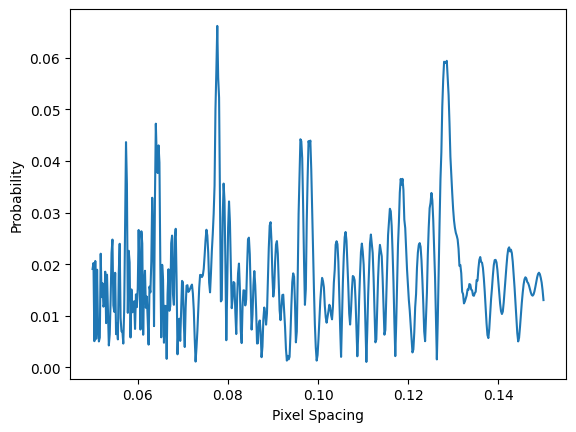

In [16]:
plt.figure()
plt.ylabel("Probability")
plt.xlabel("Pixel Spacing")
plt.plot(ps_search_space, scores)

Calcular el mejor ajuste

In [17]:
pixel_spacing = ps_search_space[np.argmax(scores)]

In [18]:
pixel_spacing

0.07765531062124248